# Problem Statement

Risk Anaylsis for lending loans to the consumer, by considering the possibility of a consumer to be a defaulter on the basis of data provided

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing data for Understanding

In [2]:
df = pd.read_csv('loan.csv')
df.head()

/var/folders/6v/wpfttkpx5s73dfb_kzj6dwj00000gn/T/ipykernel_61854/3318210521.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Analysing data of each column

In [3]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
df.shape

(39717, 111)

In [6]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Checking for duplicate data

In [7]:
df.duplicated("id").sum()

0

### Checking for empty rows

In [8]:
df.isnull().all(axis=1).sum()

0

### Checking for empty columns

In [9]:
df.isnull().all(axis=0).sum()

54

### Some of the columns appears to be empty so we can drop those

In [10]:
df.dropna(axis=1,how="all", inplace=True)


In [11]:
df.isnull().mean()*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


### Columns which are not relevant for analysis

 
 - id - It doesn't add any value to the analysis
 - member_id - It doesn't add any value to the analysis
 - pymnt_plan - Since it just consist value as 'n' so it wont contribute in the analysis
 - url - It is just a link to a document so can be dropped
 - desc - It is just the comment of applying loan
 - title - It is custom text entered by the borrower
 - zip_code - Its to specific to perform analysis on
 - initial_list_status - Since it just consist value as 'f' so it wont contribute in the analysis
 - next_pymnt_d - Since 97% of the rows are null so we can drop it
 - collections_12_mths_ex_med - Since it just consist value as '0.0' so it wont contribute in the analysis
 - policy_code - Since it just consist value as 1 so it wont contribute in the analysis
 - application_type - Since it just consist value as 'INDIVIDUAL' so it wont contribute in the analysis
 - acc_now_delinq - Since it just consist value as 0 so it wont contribute in the analysis
 - chargeoff_within_12_mths - Since it just consist value as 0.0 so it wont contribute in the analysis
 - delinq_amnt - Since it just consist value as 0 so it wont contribute in the analysis
 - pub_rec_bankruptcies - Majority of the value is 0 so can be dropped
 - tax_liens - Since it just consist value as 0.0 so it wont contribute in the analysis
 - mths_since_last_delinq - Since the empty value percentage is more than 40% so we can drop this
 - mths_since_last_record - Since the empty value percentage is more than 40% so we can drop this
 - emp_title - Too much random values for analysis
 


In [12]:
df.drop(columns=['id','member_id','pymnt_plan','url','desc', 'title','zip_code','initial_list_status','next_pymnt_d','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens','mths_since_last_delinq','mths_since_last_record','emp_title'], inplace=True)

In [13]:
df.shape

(39717, 37)

In [14]:
df.isnull().mean()*100

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.125891
total_acc                  0.000000
out_prncp                  0.000000
out_prncp_inv              0.000000
total_pymnt                0

In [15]:
df.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv     

### Converting values to appropariate data types

In [16]:
df['term'] = df['term'].apply(lambda x: int(x.replace(" months","")))
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.replace("%","")))

In [17]:
df['emp_length'] = df['emp_length'].str.extract('(\d+)')

In [18]:
df['issue_d'] = pd.to_datetime(df['issue_d'],format="%b-%y")

In [19]:
df['issue_Month'] = df['issue_d'].dt.month
df['issue_Year'] = df['issue_d'].dt.year

In [20]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'],format="%b-%y")
df['earliest_cr_line_Month'] = df['earliest_cr_line'].dt.month
df['earliest_cr_line_Year'] = df['earliest_cr_line'].dt.year

In [21]:
df['revol_util'] = df['revol_util'].str.rstrip('%')

In [22]:
df['revol_util'] = df['revol_util'].astype('float')

In [23]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'],format="%b-%y")
df['last_pymnt_Month'] = df['last_pymnt_d'].dt.month
df['last_pymnt_Year'] = df['last_pymnt_d'].dt.year

In [24]:
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'],format="%b-%y")
df['last_credit_pull_Month'] = df['last_credit_pull_d'].dt.month
df['last_credit_pull_Year'] = df['last_credit_pull_d'].dt.year

### Handling null values

In [25]:
df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_re

In [26]:
df["emp_length"].fillna(0,inplace=True)
df['emp_length'] = df['emp_length'].astype('int32')

In [27]:
df.dropna(axis=0,subset=['revol_util'],inplace=True)

In [28]:
df.dtypes

loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                                int64
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_length                          int32
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
purpose                            object
addr_state                         object
dti                               float64
delinq_2yrs                         int64
earliest_cr_line           datetime64[ns]
inq_last_6mths                      int64
open_acc                            int64
pub_rec                             int64
revol_bal                           int64
revol_util                        

### Handling Outliers

/Users/prasoonmahawar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

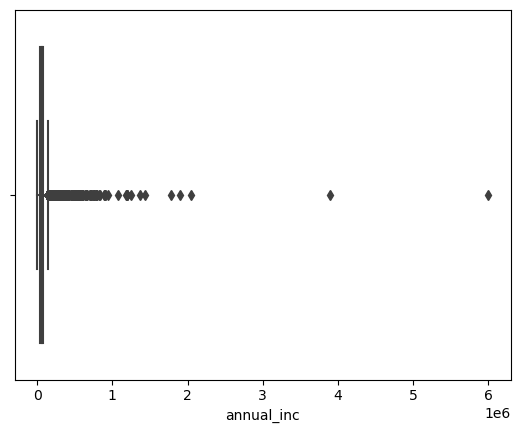

In [29]:
sns.boxplot(df['annual_inc'])

In [30]:
df['annual_inc'].quantile([0.5,0.75,0.80,0.85,0.90,0.95])

0.50     59000.0
0.75     82400.0
0.80     90000.0
0.85    100000.0
0.90    116000.0
0.95    142000.0
Name: annual_inc, dtype: float64

In [31]:
# Removing values higher than the 90th percentile
df= df[df['annual_inc'] <= df['annual_inc'].quantile(0.90)] 

/Users/prasoonmahawar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

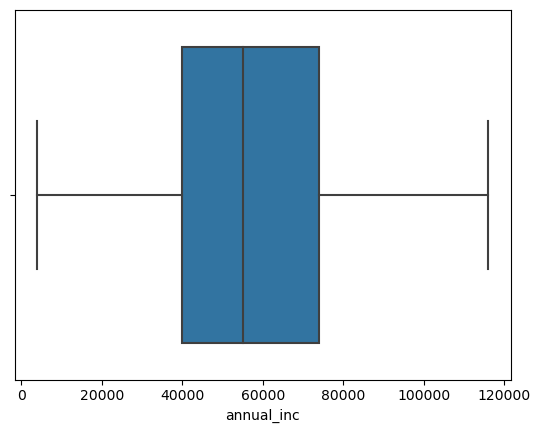

In [32]:
sns.boxplot(df['annual_inc'])

In [33]:
df.shape

(35723, 45)

/Users/prasoonmahawar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

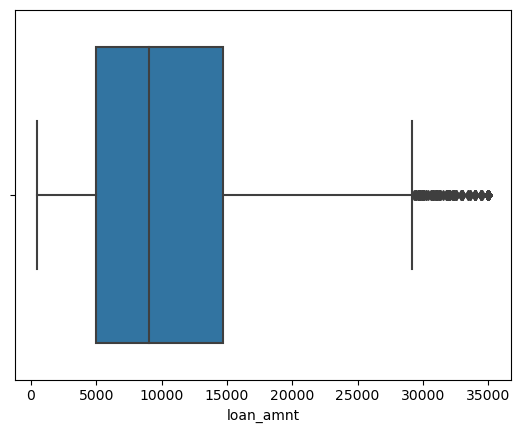

In [34]:
sns.boxplot(df['loan_amnt'])

In [35]:
df['loan_amnt'].describe()

count    35723.000000
mean     10573.904067
std       6950.794056
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14675.000000
max      35000.000000
Name: loan_amnt, dtype: float64

/Users/prasoonmahawar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_rate'>

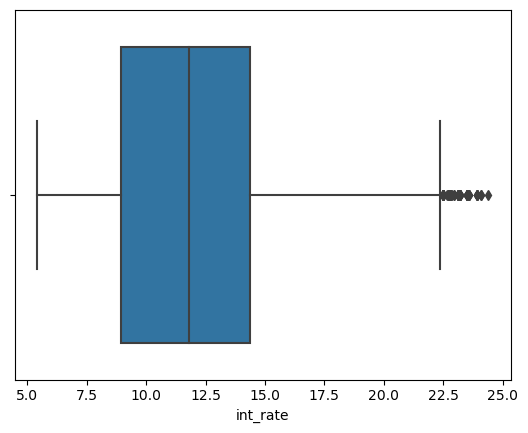

In [36]:
sns.boxplot(df['int_rate'])

/Users/prasoonmahawar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='funded_amnt'>

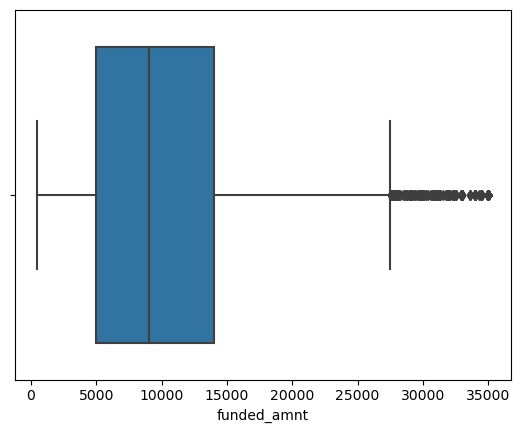

In [37]:
sns.boxplot(df['funded_amnt'])

### Performing Univariate analysis on Categorical Variables

/Users/prasoonmahawar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

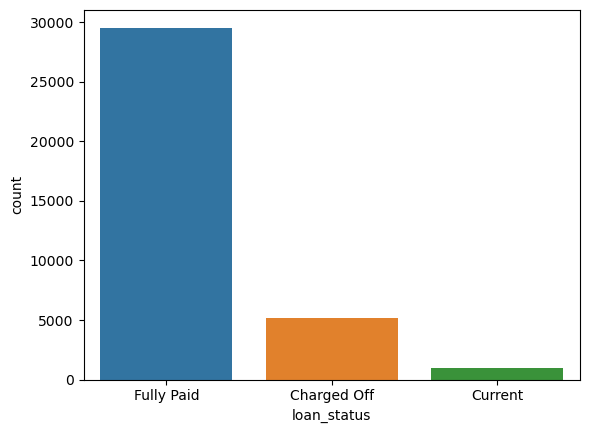

In [38]:
sns.countplot(df['loan_status'])

/Users/prasoonmahawar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='count'>

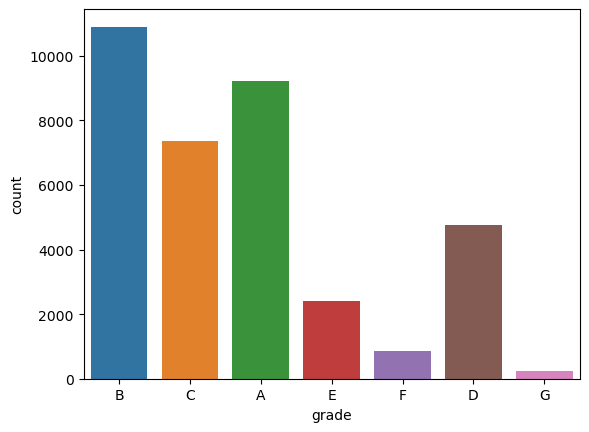

In [39]:
sns.countplot(df['grade'])

In [40]:

df['sub_grade'] = df['sub_grade'].apply(lambda x: int(x[-1]))

<AxesSubplot:xlabel='grade', ylabel='count'>

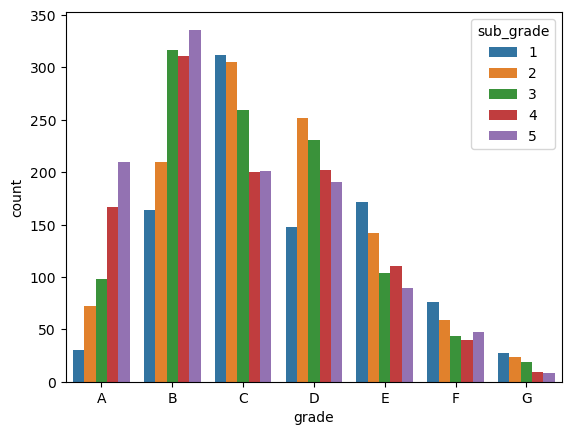

In [41]:
sns.countplot(x='grade', order=['A','B','C','D','E','F','G'], hue='sub_grade',data=df[df['loan_status'] == 'Charged Off'])

<AxesSubplot:xlabel='grade', ylabel='count'>

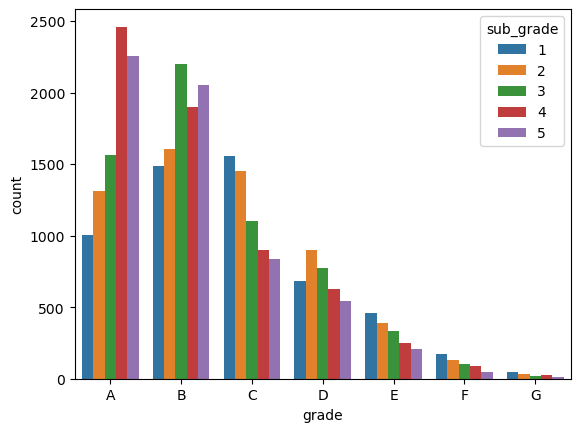

In [42]:
sns.countplot(x='grade', order=['A','B','C','D','E','F','G'], hue='sub_grade',data=df[df['loan_status'] == 'Fully Paid'])

<AxesSubplot:xlabel='grade', ylabel='count'>

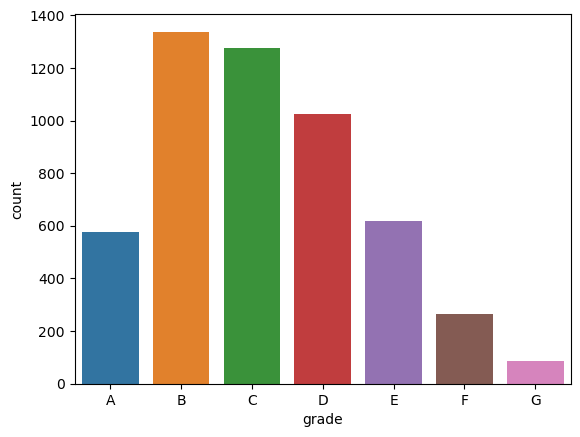

In [43]:
sns.countplot(x='grade', order=['A','B','C','D','E','F','G'],data=df[df['loan_status'] == 'Charged Off'])

/Users/prasoonmahawar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

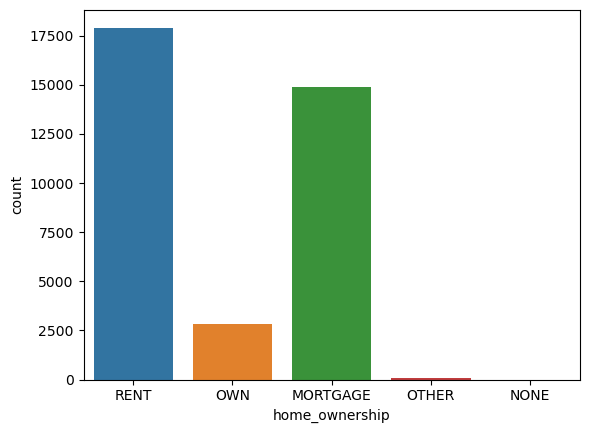

In [44]:
sns.countplot(df['home_ownership'])

In [45]:
df['home_ownership'].value_counts()

RENT        17915
MORTGAGE    14894
OWN          2824
OTHER          88
NONE            2
Name: home_ownership, dtype: int64

In [46]:
#Since NONE has only 2 values so replacing it with OTHER

df['home_ownership'] = df['home_ownership'].replace(to_replace = ['NONE'], value="OTHER")

In [47]:
df['home_ownership'].value_counts()

RENT        17915
MORTGAGE    14894
OWN          2824
OTHER          90
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

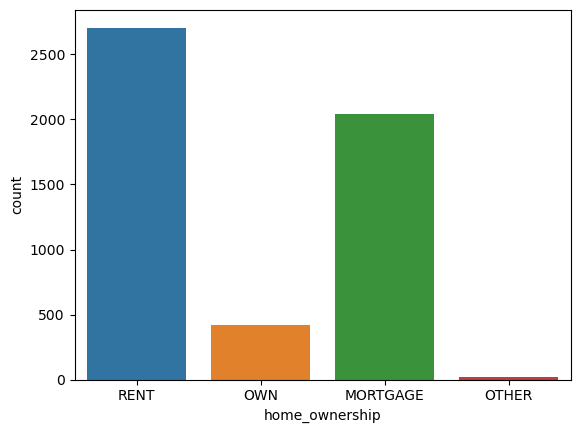

In [102]:
sns.countplot(x='home_ownership', data=df[df['loan_status'] == 'Charged Off'])

### Observation

- Most of the loans get defaulted with person having Rent followed by person with Mortgage
- Person owing the the house are less like to default

In [49]:
df['purpose'].value_counts()

debt_consolidation    17014
credit_card            4596
other                  3645
home_improvement       2390
major_purchase         1980
small_business         1585
car                    1437
wedding                 862
medical                 614
moving                  522
vacation                356
house                   330
educational             302
renewable_energy         90
Name: purpose, dtype: int64

<AxesSubplot:xlabel='count', ylabel='purpose'>

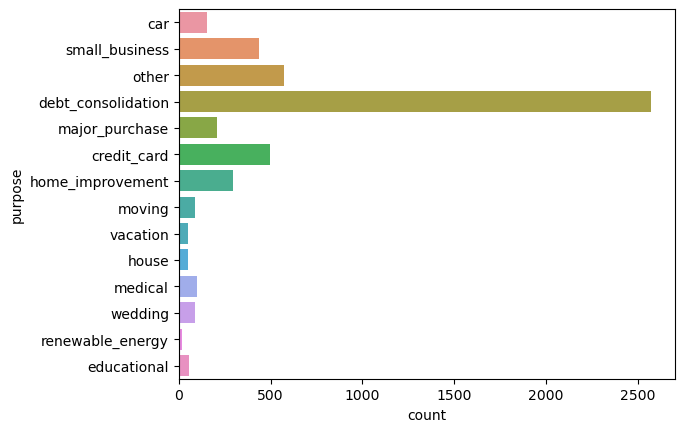

In [50]:
sns.countplot(y='purpose', data=df[df['loan_status'] == 'Charged Off'])

In [51]:
df['addr_state'].value_counts()

CA    6242
NY    3412
FL    2629
TX    2382
NJ    1604
PA    1403
IL    1379
GA    1263
VA    1244
MA    1167
OH    1138
MD     909
AZ     794
WA     766
CO     733
NC     725
MI     663
CT     660
MO     651
MN     572
NV     449
SC     439
WI     426
AL     424
OR     420
LA     393
KY     307
OK     276
KS     248
UT     238
AR     229
DC     183
RI     182
NM     178
WV     173
HI     158
NH     152
DE     105
MT      83
WY      81
AK      68
SD      63
VT      52
MS      18
TN      15
IN       9
IA       5
NE       5
ID       5
ME       3
Name: addr_state, dtype: int64

<AxesSubplot:xlabel='count', ylabel='addr_state'>

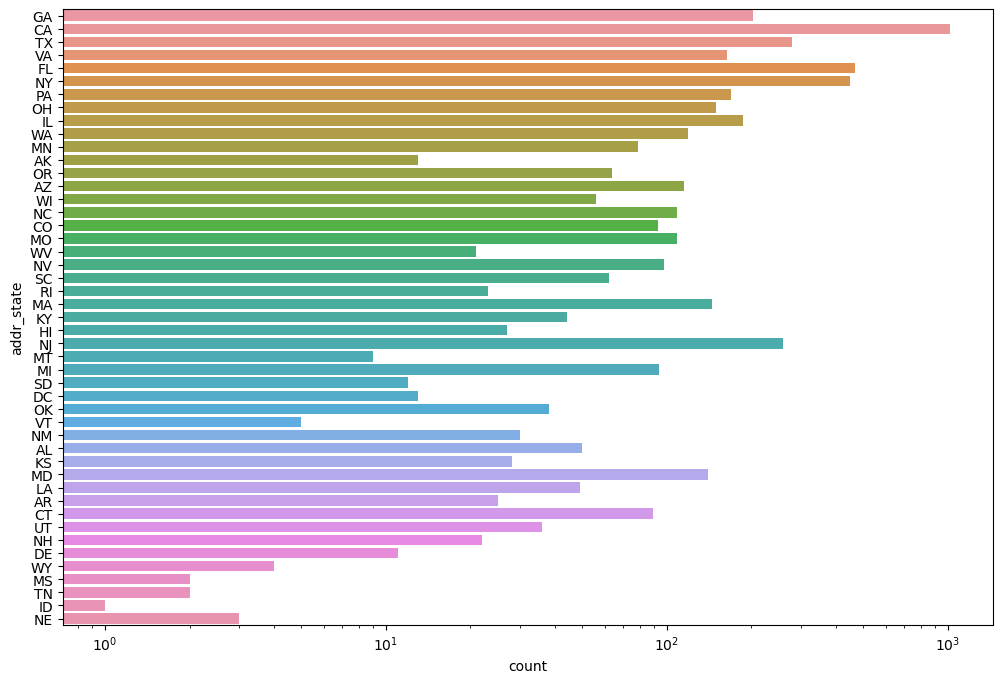

In [52]:
fig,ax = plt.subplots(figsize = (12,8))
ax.set(xscale='log')
sns.countplot(y='addr_state', data=df[df['loan_status'] == 'Charged Off'])

### Converting numerical variables in to categorical by creating bins

In [53]:
df['int_rate_bin'] = pd.cut(df['int_rate'], bins=4,precision=0, labels=['5-10%','10-15%','15-20%','20-25%'])
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_credit_pull_d,issue_Month,issue_Year,earliest_cr_line_Month,earliest_cr_line_Year,last_pymnt_Month,last_pymnt_Year,last_credit_pull_Month,last_credit_pull_Year,int_rate_bin
0,5000,5000,4975.0,36,10.65,162.87,B,2,10,RENT,...,2016-05-01,12,2011,1,1985,1.0,2015.0,5.0,2016.0,10-15%
1,2500,2500,2500.0,60,15.27,59.83,C,4,1,RENT,...,2013-09-01,12,2011,4,1999,4.0,2013.0,9.0,2013.0,15-20%
2,2400,2400,2400.0,36,15.96,84.33,C,5,10,RENT,...,2016-05-01,12,2011,11,2001,6.0,2014.0,5.0,2016.0,15-20%
3,10000,10000,10000.0,36,13.49,339.31,C,1,10,RENT,...,2016-04-01,12,2011,2,1996,1.0,2015.0,4.0,2016.0,10-15%
4,3000,3000,3000.0,60,12.69,67.79,B,5,1,RENT,...,2016-05-01,12,2011,1,1996,5.0,2016.0,5.0,2016.0,10-15%


<AxesSubplot:xlabel='int_rate_bin', ylabel='count'>

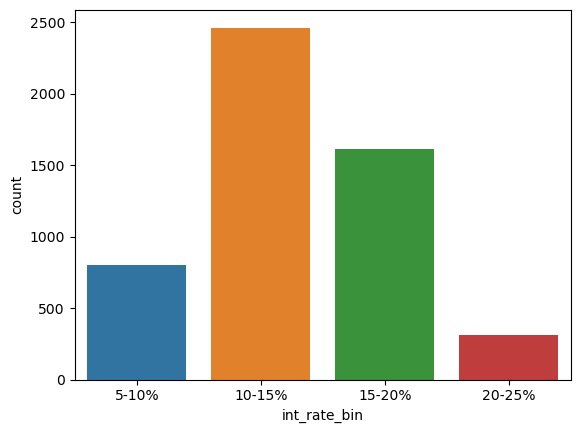

In [54]:
sns.countplot(x='int_rate_bin', data=df[df['loan_status'] == 'Charged Off'])

In [55]:
df['open_acc'].describe()

count    35723.000000
mean         9.096045
std          4.314681
min          2.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         42.000000
Name: open_acc, dtype: float64

<AxesSubplot:xlabel='open_acc_bin', ylabel='count'>

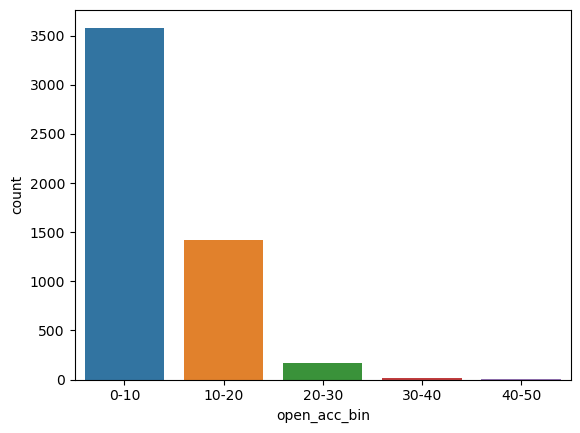

In [56]:
df['open_acc_bin'] = pd.cut(df['open_acc'], bins=5,precision=0, labels=['0-10','10-20','20-30','30-40','40-50'])
sns.countplot(x='open_acc_bin', data=df[df['loan_status'] == 'Charged Off'])

In [57]:
df['annual_inc'].describe()


count     35723.000000
mean      57468.878623
std       23685.242931
min        4000.000000
25%       39996.000000
50%       55000.000000
75%       74000.000000
max      116000.000000
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc_bin', ylabel='count'>

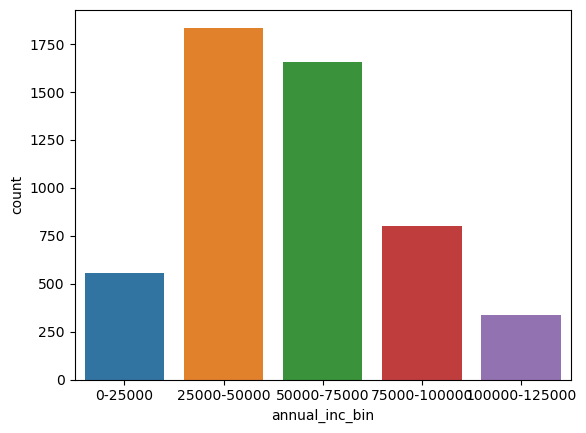

In [58]:
df['annual_inc_bin'] = pd.cut(df['annual_inc'], bins=5,precision=0, labels=['0-25000','25000-50000','50000-75000','75000-100000','100000-125000'])
sns.countplot(x='annual_inc_bin', data=df[df['loan_status'] == 'Charged Off'])

In [59]:
df['total_acc'].describe()

count    35723.000000
mean        21.308177
std         11.058657
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         87.000000
Name: total_acc, dtype: float64

<AxesSubplot:xlabel='total_acc_bin', ylabel='count'>

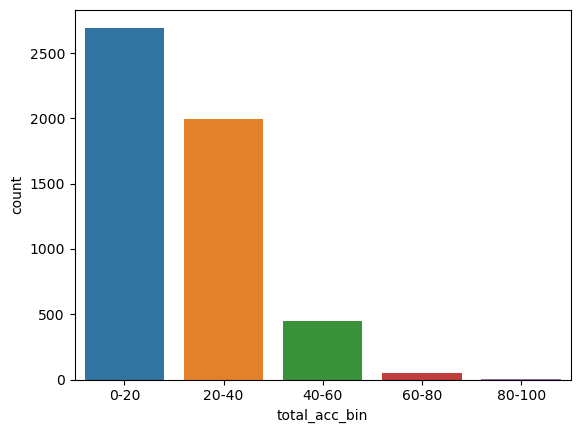

In [60]:
df['total_acc_bin'] = pd.cut(df['total_acc'], bins=5,precision=0, labels=['0-20','20-40','40-60','60-80','80-100'])
sns.countplot(x='total_acc_bin', data=df[df['loan_status'] == 'Charged Off'])

### Performing Bivariate analysis

In [61]:
df[df['loan_status'] == 'Charged Off'][['loan_amnt','annual_inc','total_pymnt','installment','int_rate','dti','emp_length','issue_Month','issue_Year']].corr()

,loan_amnt,annual_inc,total_pymnt,installment,int_rate,dti,emp_length,issue_Month,issue_Year
loan_amnt,1.000000,0.460637,0.667583,0.926371,0.333145,0.086553,0.205732,0.067044,0.119760
annual_inc,0.460637,1.000000,0.319892,0.454314,0.153348,-0.004735,0.246768,0.034582,0.011416
total_pymnt,0.667583,0.319892,1.000000,0.656739,0.242490,0.062670,0.162491,0.051194,0.099136
installment,0.926371,0.454314,0.656739,1.000000,0.313974,0.064894,0.178988,0.048258,0.033063
int_rate,0.333145,0.153348,0.242490,0.313974,1.000000,0.040344,0.059170,0.076948,0.175940
dti,0.086553,-0.004735,0.062670,0.064894,0.040344,1.000000,0.063815,0.040643,0.091453
emp_length,0.205732,0.246768,0.162491,0.178988,0.059170,0.063815,1.000000,0.012118,0.092705
issue_Month,0.067044,0.034582,0.051194,0.048258,0.076948,0.040643,0.012118,1.000000,0.002787
issue_Year,0.119760,0.011416,0.099136,0.033063,0.175940,0.091453,0.092705,0.002787,1.000000


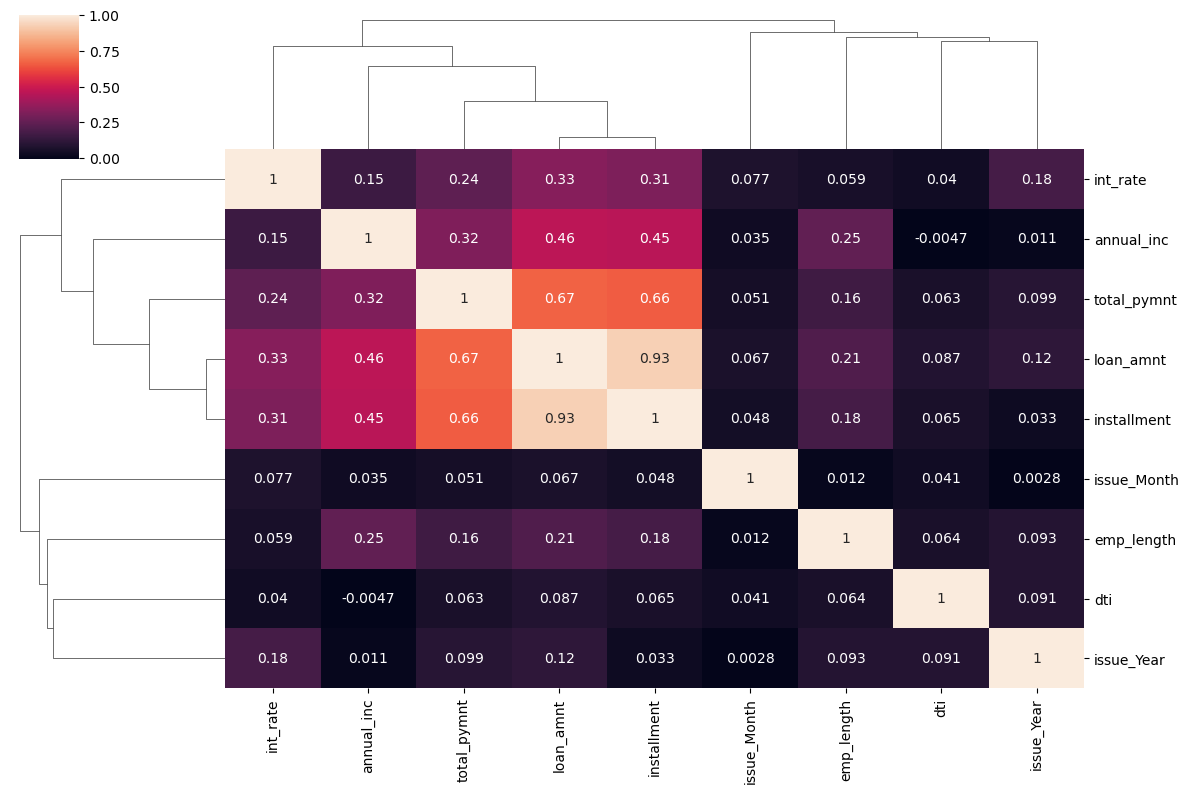

In [62]:
sns.clustermap(df[df['loan_status'] == 'Charged Off'][['loan_amnt','annual_inc','total_pymnt','installment','int_rate','dti','emp_length','issue_Month','issue_Year']].corr(), figsize=[12,8],annot=True)
plt.show()

### Here we can observer few points

- People with higher annual income has lower dti

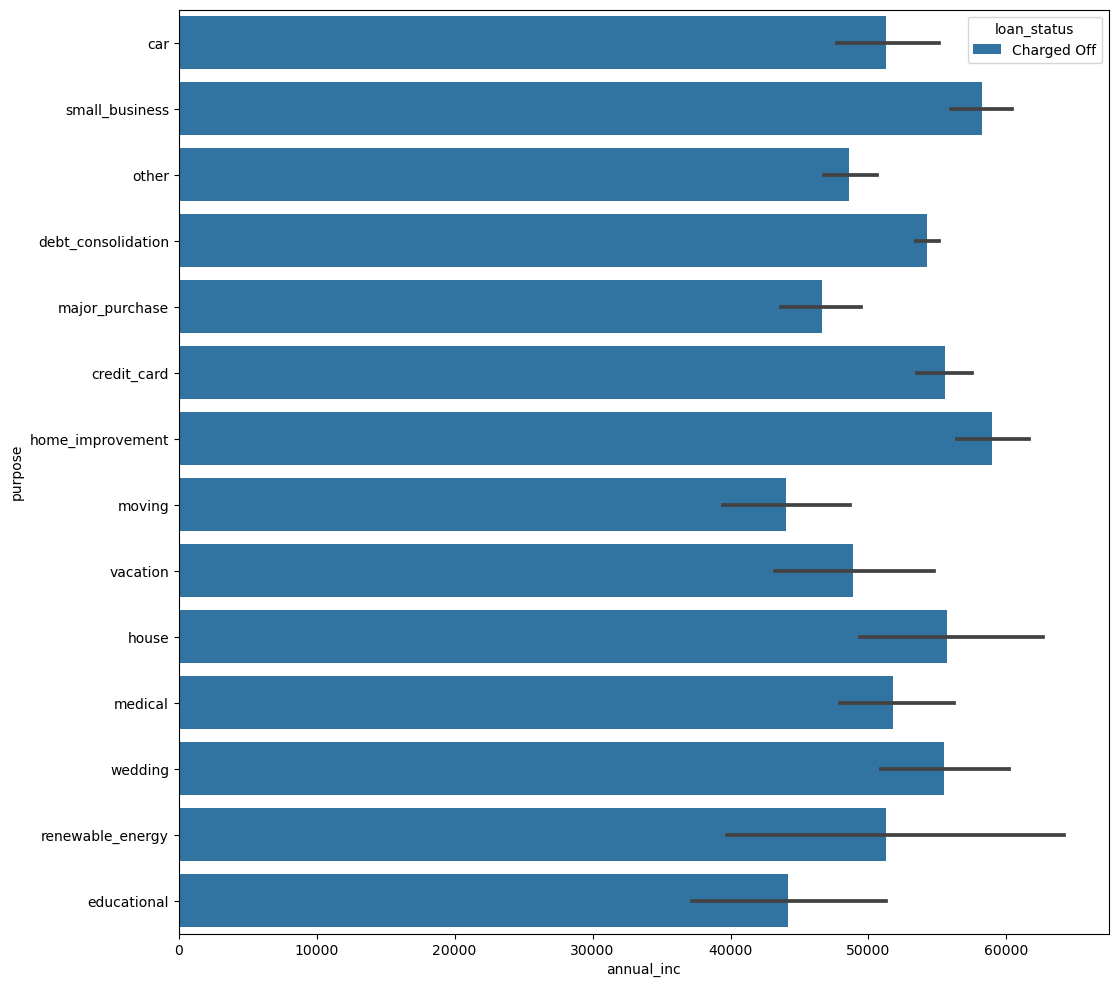

In [73]:
plt.figure(figsize = (12,12))
sns.barplot(data=df[df['loan_status'] == 'Charged Off'],x='annual_inc',y='purpose',hue="loan_status")
plt.show()

### Observations

- Person with annaul income less than 60000 are more likely to default

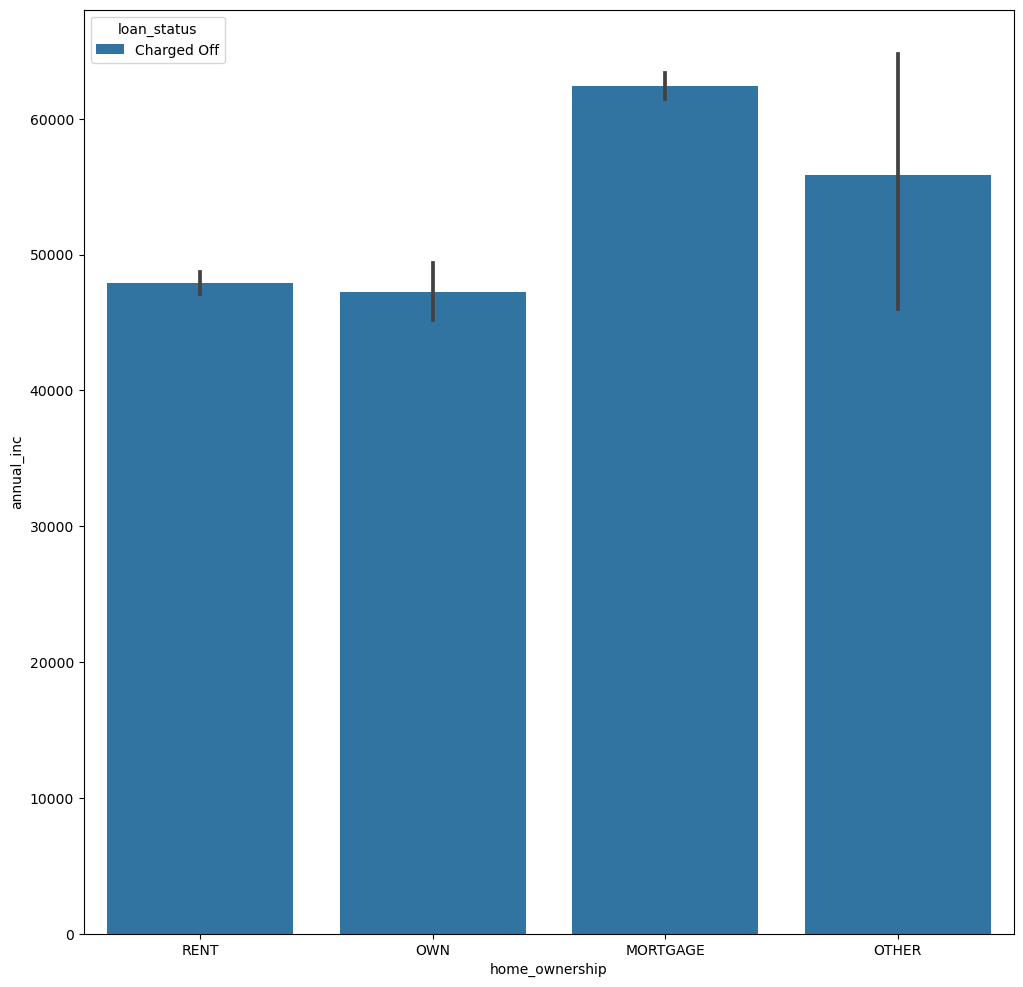

In [75]:
plt.figure(figsize = (12,12))
sns.barplot(data=df[df['loan_status'] == 'Charged Off'],x='home_ownership',y='annual_inc',hue="loan_status")
plt.show()

### Observations

- Person having mortgage are likely to default even if there annual income is more than 60000
- Person having annual income less than 50000 are more like to default independent of the home ownership status

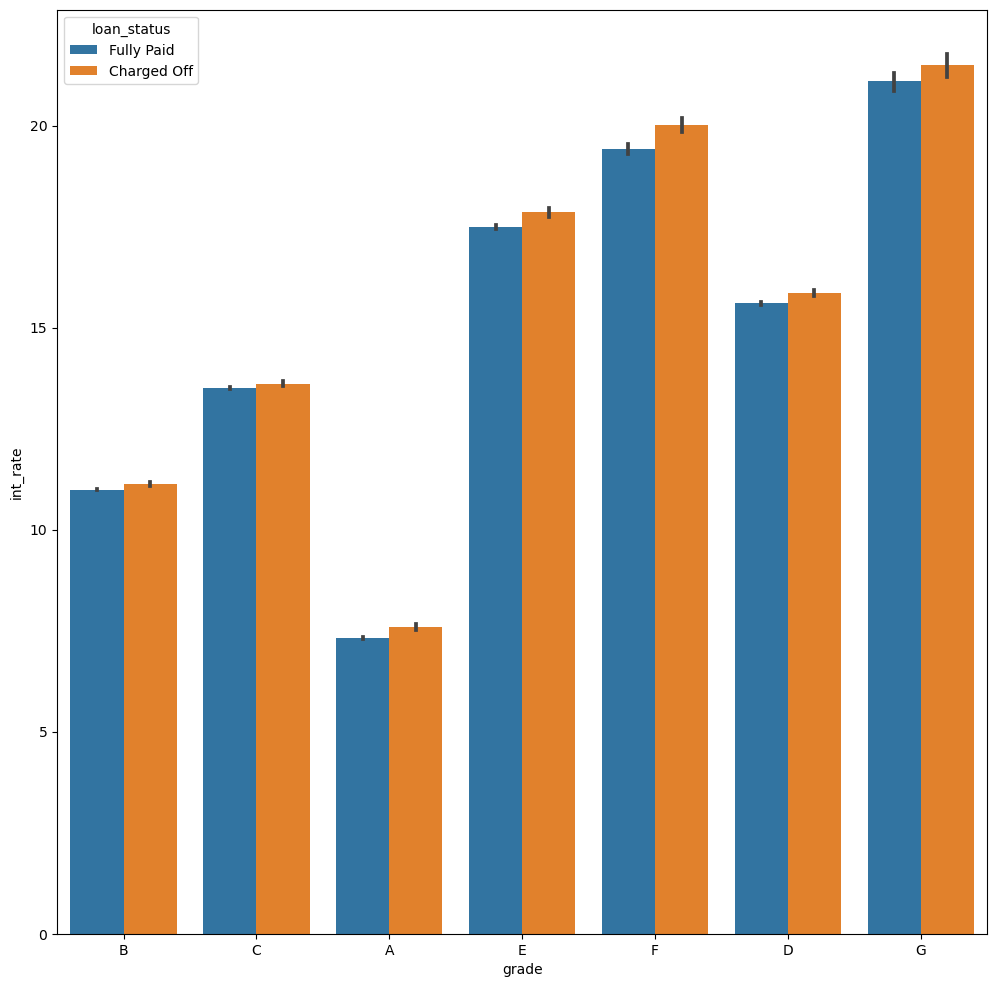

In [101]:
plt.figure(figsize = (12,12))
sns.barplot(data=df[df['loan_status'] != 'Current'],x='grade',y='int_rate',hue="loan_status")
plt.show()

### Observation

- Since grade G, F and E have higher interest rate so they are more likely to default.

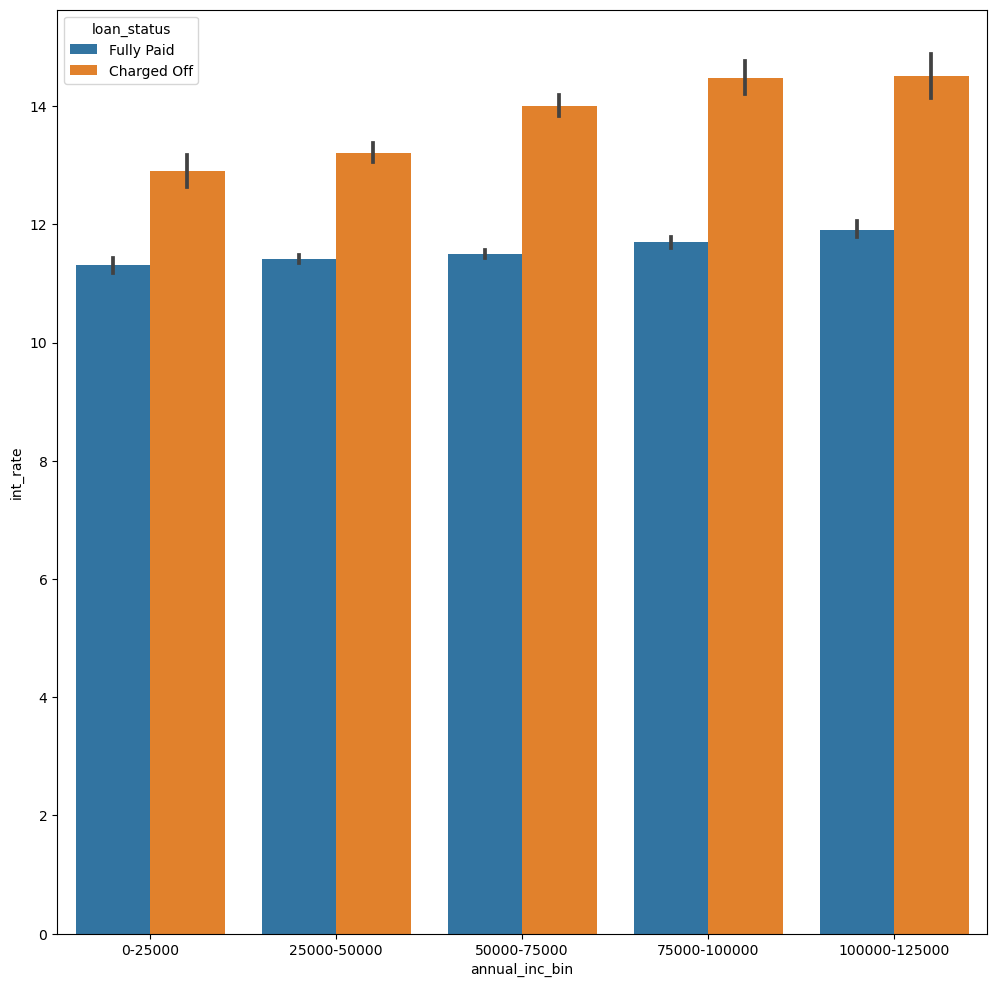

In [79]:
plt.figure(figsize = (12,12))
sns.barplot(data=df[df['loan_status'] != 'Current'],x='annual_inc_bin',y='int_rate',hue="loan_status")
plt.show()

### Observation

- If the Interest rate is higher than 12% than loan is getting defaulted irrespective of the annual income.

## Analysing using pivot table

In [90]:
pivot_df_an_inc = df.groupby(['annual_inc_bin','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pivot_df_an_inc['total_loans'] = pivot_df_an_inc['Charged Off'] + pivot_df_an_inc['Current'] + pivot_df_an_inc['Fully Paid']
pivot_df_an_inc['Charged_off_percent'] = round(( pivot_df_an_inc['Charged Off'] / pivot_df_an_inc['total_loans'] ) * 100, 2)
pivot_df_an_inc.head()

loan_status,annual_inc_bin,Charged Off,Current,Fully Paid,total_loans,Charged_off_percent
0,0-25000,554,36,2340,2930,18.91
1,25000-50000,1836,281,9300,11417,16.08
2,50000-75000,1658,337,9511,11506,14.41
3,75000-100000,800,228,5506,6534,12.24
4,100000-125000,338,114,2884,3336,10.13


### Observation

- Lower income group have higher percentage of charge off as per the pivot table above.
- As the income increases the charge off percentage decreases

In [93]:
pivot_df_purpose = df.groupby(['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pivot_df_purpose['total_loans'] = pivot_df_purpose['Charged Off'] + pivot_df_purpose['Current'] + pivot_df_purpose['Fully Paid']
pivot_df_purpose['Charged_off_percent'] = round(( pivot_df_purpose['Charged Off'] / pivot_df_purpose['total_loans'] ) * 100, 2)
pivot_df_purpose.sort_values(by="Charged_off_percent", ascending=False)

loan_status,purpose,Charged Off,Current,Fully Paid,total_loans,Charged_off_percent
11,small_business,436.0,69.0,1080.0,1585.0,27.51
10,renewable_energy,18.0,1.0,71.0,90.0,20.00
3,educational,53.0,0.0,249.0,302.0,17.55
8,moving,89.0,7.0,426.0,522.0,17.05
7,medical,98.0,6.0,510.0,614.0,15.96
9,other,575.0,111.0,2959.0,3645.0,15.78
5,house,50.0,11.0,269.0,330.0,15.15
2,debt_consolidation,2574.0,514.0,13926.0,17014.0,15.13
12,vacation,51.0,5.0,300.0,356.0,14.33
4,home_improvement,298.0,76.0,2016.0,2390.0,12.47


### Observation

- Loan taken with purpose as small_business and renewable energy are more likely to default.
- Loan taken with purpose as credit_card , car , major_purchase, wedding are less likely to default.

In [94]:
pivot_df_grade = df.groupby(['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pivot_df_grade['total_loans'] = pivot_df_grade['Charged Off'] + pivot_df_grade['Current'] + pivot_df_grade['Fully Paid']
pivot_df_grade['Charged_off_percent'] = round(( pivot_df_grade['Charged Off'] / pivot_df_grade['total_loans'] ) * 100, 2)
pivot_df_grade.sort_values(by="Charged_off_percent", ascending=False)

loan_status,grade,Charged Off,Current,Fully Paid,total_loans,Charged_off_percent
6,G,87,12,139,238,36.55
5,F,266,53,540,859,30.97
4,E,617,150,1638,2405,25.65
3,D,1024,197,3536,4757,21.53
2,C,1277,235,5842,7354,17.36
1,B,1338,310,9253,10901,12.27
0,A,577,39,8593,9209,6.27


### Observation

- Loan with grade as G and F have higher chances of getting default
- Loan with grade as A has the lowest chances of getting default

In [97]:
pivot_df_intRate = df.groupby(['int_rate_bin','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pivot_df_intRate['total_loans'] = pivot_df_intRate['Charged Off'] + pivot_df_intRate['Current'] + pivot_df_intRate['Fully Paid']
pivot_df_intRate['Charged_off_percent'] = round(( pivot_df_intRate['Charged Off'] / pivot_df_intRate['total_loans'] ) * 100, 2)
pivot_df_intRate.sort_values(by="Charged_off_percent", ascending=False)

loan_status,int_rate_bin,Charged Off,Current,Fully Paid,total_loans,Charged_off_percent
3,20-25%,313,98,462,873,35.85
2,15-20%,1610,356,4902,6868,23.44
1,10-15%,2462,468,13667,16597,14.83
0,5-10%,801,74,10510,11385,7.04


### Observation

- Loan with interest rate between 20-25% has higher percentage of charge off
- Loan with interest rate between 5-10% has lower percentage of charge off

In [98]:
pivot_df_emp_length = df.groupby(['emp_length','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pivot_df_emp_length['total_loans'] = pivot_df_emp_length['Charged Off'] + pivot_df_emp_length['Current'] + pivot_df_emp_length['Fully Paid']
pivot_df_emp_length['Charged_off_percent'] = round(( pivot_df_emp_length['Charged Off'] / pivot_df_emp_length['total_loans'] ) * 100, 2)
pivot_df_emp_length.sort_values(by="Charged_off_percent", ascending=False)

loan_status,emp_length,Charged Off,Current,Fully Paid,total_loans,Charged_off_percent
0,0,224,41,773,1038,21.58
10,10,1196,322,6091,7609,15.72
7,7,241,56,1324,1621,14.87
1,1,1024,132,6009,7165,14.29
5,5,422,76,2487,2985,14.14
3,3,517,71,3114,3702,13.97
6,6,281,57,1692,2030,13.84
8,8,180,40,1082,1302,13.82
4,4,428,89,2622,3139,13.63
2,2,530,84,3405,4019,13.19


### Observation 

- Employee with work experience less than 1 year are more likely to default
- Employee with work experience more than 1 year and less than equal 9 years are less likely to default

In [99]:
pivot_df_open_acc = df.groupby(['open_acc_bin','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pivot_df_open_acc['total_loans'] = pivot_df_open_acc['Charged Off'] + pivot_df_open_acc['Current'] + pivot_df_open_acc['Fully Paid']
pivot_df_open_acc['Charged_off_percent'] = round(( pivot_df_open_acc['Charged Off'] / pivot_df_open_acc['total_loans'] ) * 100, 2)
pivot_df_open_acc.sort_values(by="Charged_off_percent", ascending=False)

loan_status,open_acc_bin,Charged Off,Current,Fully Paid,total_loans,Charged_off_percent
3,30-40,15,1,56,72,20.83
2,20-30,165,35,893,1093,15.10
0,0-10,3583,645,20229,24457,14.65
1,10-20,1422,315,8356,10093,14.09
4,40-50,1,0,7,8,12.50


### Observation 

- People having 30-40 open accounts are more likely to default
- People having more than 40 open accounts are less likely to default

In [100]:
pivot_df_total_acc = df.groupby(['total_acc_bin','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pivot_df_total_acc['total_loans'] = pivot_df_total_acc['Charged Off'] + pivot_df_total_acc['Current'] + pivot_df_total_acc['Fully Paid']
pivot_df_total_acc['Charged_off_percent'] = round(( pivot_df_total_acc['Charged Off'] / pivot_df_total_acc['total_loans'] ) * 100, 2)
pivot_df_total_acc.sort_values(by="Charged_off_percent", ascending=False)

loan_status,total_acc_bin,Charged Off,Current,Fully Paid,total_loans,Charged_off_percent
0,0-20,2695,430,14506,17631,15.29
2,40-60,447,92,2557,3096,14.44
1,20-40,1992,469,12146,14607,13.64
3,60-80,51,5,322,378,13.49
4,80-100,1,0,10,11,9.09


### Observation 

- People having less than 20 total accounts are more likely to default
- People having more than 80 total accounts are less likely to default